In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

     Name      Surname  Age  Smokes  AreaQ  Alkhol  Result
0    John         Wick   35       3      5       4       1
1    John  Constantine   27      20      2       5       1
2  Camela     Anderson   30       0      5       2       0
3    Alex       Telles   28       0      8       1       0
4   Diego     Maradona   68       4      5       6       1


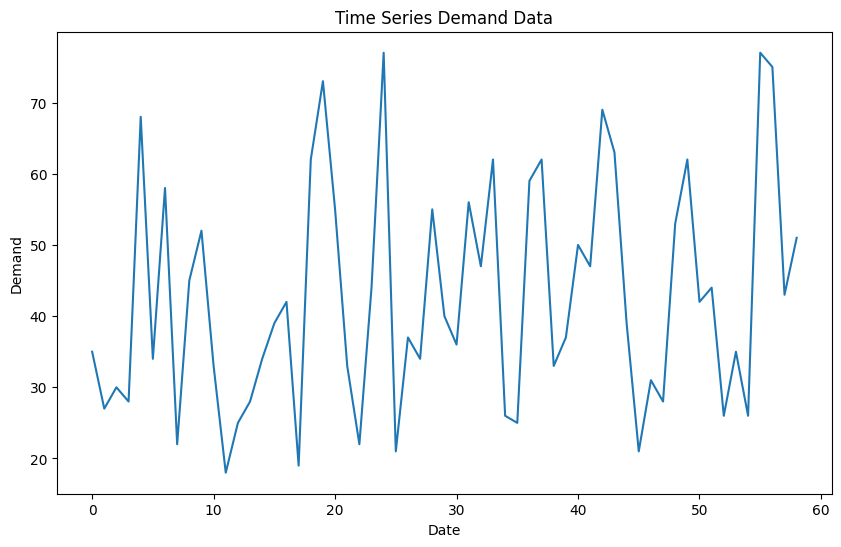

In [4]:
# Load dataset (replace 'data.csv' with your dataset file)
data = pd.read_csv('/content/drive/MyDrive/AL Colab/lung_cancer_examples.csv')
print(data.head().to_string())

# Plot the time series data
data['Age'].plot(figsize=(10, 6), title='Time Series Demand Data')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.show()

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Extract the target variable
demand_values = data['Age'].values

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(demand_values.reshape(-1, 1))

# Create sequences for LSTM
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

# Set sequence length
sequence_length = 10

# Generate sequences
X, y = create_sequences(scaled_data, sequence_length)

# Split the data into train and test sets (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Check the shapes
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (39, 10, 1)
Testing data shape: (10, 10, 1)


In [6]:
# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),  # Regularization
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),  # Fully connected layer
    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 632ms/step - loss: 0.2502 - val_loss: 0.3013
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.2003 - val_loss: 0.2495
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.1699 - val_loss: 0.1984
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.1296 - val_loss: 0.1513
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.1000 - val_loss: 0.1136


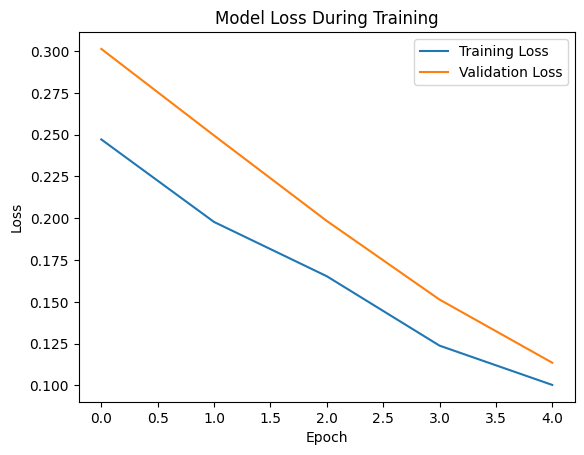

In [7]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=5,
    batch_size=32,
    verbose=1
)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
Mean Absolute Error (MAE): 14.72230339050293
Root Mean Squared Error (RMSE): 19.882157254631778


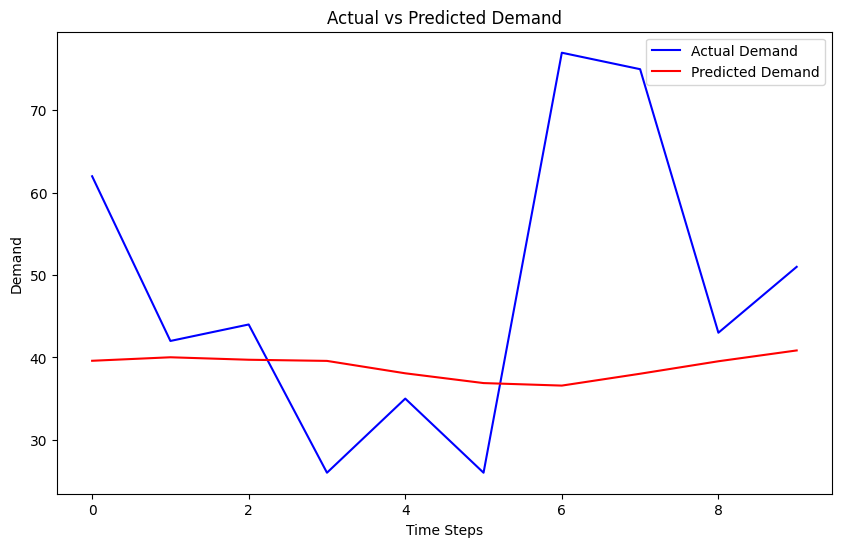

In [8]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Reverse scaling

# Reverse scale actual y_test
y_test_original = scaler.inverse_transform(y_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test_original, predictions)
rmse = np.sqrt(mean_squared_error(y_test_original, predictions))
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label='Actual Demand', color='blue')
plt.plot(predictions, label='Predicted Demand', color='red')
plt.title('Actual vs Predicted Demand')
plt.xlabel('Time Steps')
plt.ylabel('Demand')
plt.legend()
plt.show()


In [11]:
df




,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1
5,Cristiano,Ronaldo,34,0,10,0,0
6,Mihail,Tal,58,15,10,0,0
7,Kathy,Bates,22,12,5,2,0
8,Nicole,Kidman,45,2,6,0,0
9,Ray,Milland,52,18,4,5,1
